# Brightness transformations

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rgb = cv2.imread('data/robot.bmp')[..., ::-1]
rgb.dtype, rgb.shape

(dtype('uint8'), (234, 160, 3))

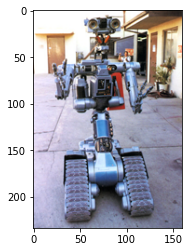

In [3]:
plt.imshow(rgb);

In [4]:
rgb.shape

(234, 160, 3)

In [6]:
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
gray.dtype, gray.shape

(dtype('uint8'), (234, 160))

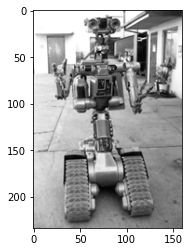

In [7]:
plt.imshow(gray, cmap='gray', vmin=0, vmax=255);

# Error correction & vignette effect

In [8]:
np.arange(4)

array([0, 1, 2, 3])

In [9]:
X, Y =np.meshgrid(np.arange(4), np.arange(3))

In [10]:
X

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [11]:
Y

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2]])

Create the vignette effect by calculating (axis normalized) distance from the center:

In [12]:
# vignette
x, y = np.meshgrid(np.arange(rgb.shape[1]), np.arange(rgb.shape[0]))
xc, yc = rgb.shape[1] / 2, rgb.shape[0] / 2
dx2 = (x - xc) ** 2 / rgb.shape[1] ** 2
dy2 = (y - yc) ** 2 / rgb.shape[0] ** 2
eff = np.clip(1.2 - np.sqrt(dx2 + dy2), 0., 1.)

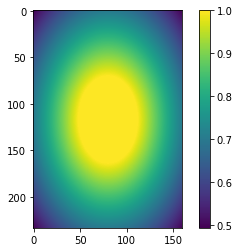

In [13]:
plt.imshow(eff)
plt.colorbar();

Alternatively, we can use 2D Gaussian distribution:

In [14]:
x, y = np.meshgrid(np.arange(rgb.shape[1]), np.arange(rgb.shape[0]))

eff_ = np.clip(-1. + 2.15 * np.exp(-(x - xc) ** 2 / rgb.shape[1] ** 2 - (y - yc) ** 2 / rgb.shape[0] ** 2), 0., 1.)

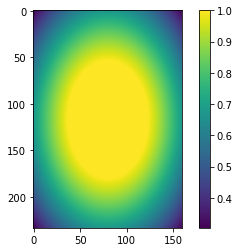

In [15]:
plt.imshow(eff_)
plt.colorbar();

Multiply the input image `rgb` by the `eff` matrix:

In [16]:
# channel by channel
out = np.zeros(rgb.shape, dtype=rgb.dtype)
for c in range(rgb.shape[2]):
    out[..., c] = eff * rgb[..., c]
out.dtype

dtype('uint8')

In [17]:
# broadcasting
out_ = (eff_[..., None] * rgb).astype(np.uint8)
out_.dtype, out_.shape

(dtype('uint8'), (234, 160, 3))

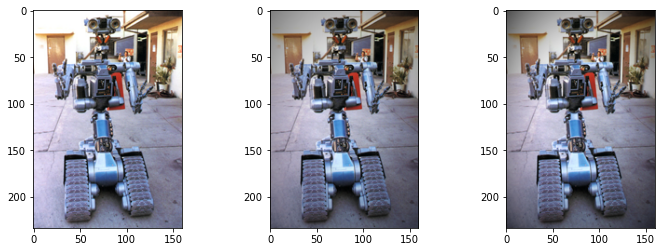

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(rgb)
plt.subplot(1, 3, 2)
plt.imshow(out)
plt.subplot(1, 3, 3)
plt.imshow(out_);

# Brightness transformations using pixel-wise rule

## Negative

In [19]:
# gray negative
neg = 255 - gray

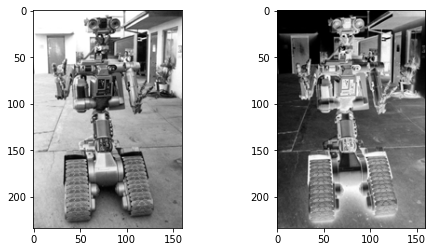

In [20]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(neg, cmap='gray', vmin=0, vmax=255);

## Thresholding

In [21]:
# gray thresholding
seg = np.zeros_like(gray)
seg[gray >= 120] = 255

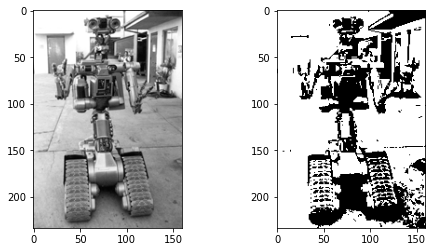

In [22]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(seg, cmap='gray', vmin=0, vmax=255);

# Lookup table for pixel-wise brightness / color transformations

## Negative

In [23]:
# original brightness values
p = np.arange(256)
p

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [24]:
# transformed values: grayscale negative (lookup table for each possible brightness value)
q_neg = 255 - p
q_neg

array([255, 254, 253, 252, 251, 250, 249, 248, 247, 246, 245, 244, 243,
       242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230,
       229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217,
       216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204,
       203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191,
       190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178,
       177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165,
       164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152,
       151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139,
       138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126,
       125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113,
       112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,
        99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,
        86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  7

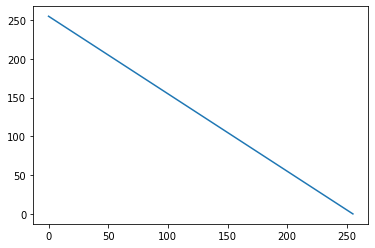

In [25]:
plt.plot(q_neg);

 Remap:

In [26]:
gray[3, 3]

255

In [27]:
q_neg[255]

0

In [28]:
q_neg[[255, 100, 80]]

array([  0, 155, 175])

In [29]:
q_neg[np.array([
    [255, 255, 255, 255, 100, 80, 80, 70],
    [255, 255, 255, 230, 150, 100, 80, 80]
])]

array([[  0,   0,   0,   0, 155, 175, 175, 185],
       [  0,   0,   0,  25, 105, 155, 175, 175]])

In [30]:
# using the lookup table approach effficiently
neg = q_neg[gray]

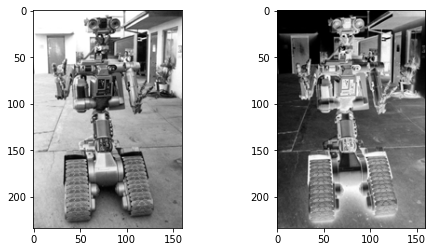

In [31]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(neg, cmap='gray', vmin=0, vmax=255);

## Thresholding

In [32]:
# thresholding lookup table
q_seg = np.zeros(256, dtype=np.uint8)
q_seg[100:] = 255

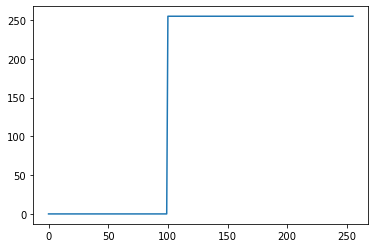

In [33]:
plt.plot(q_seg);

In [34]:
# remapusing the lookup table approach
seg = q_seg[gray]

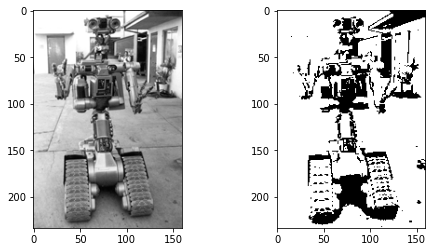

In [35]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(seg, cmap='gray', vmin=0, vmax=255);

### Homework: implement `create_lut` function

Implement the function `create_lut` that will create a brightness transformation lookup table based on user's input. It's inputs are
- `points`: list of `(p, q)` pairs such that brightness `p` maps to `q` in the resulting table
Returns:
- `q_enh`: lookup table as a vector of 256 values of type `np.ndarray` with shape `(256,)`

User specifies arbitrarily-sized sparse `list` of `(p, q)` pairs of which input brightness `p` should map to which output brightness `q`. Everything in-between should be interpolated. For example `create_lut([(0, 255), (255, 0)])` should return the same lookup table as `q_neg`, because in this example p=0 maps to q=255 and p=255 maps to q=0 and everything else will be linearly interpolated.

In [36]:
def create_lut(points: list[tuple[int, int]]) -> np.ndarray:
    """
    lookup table for arbitrary brightness transformation
    """

    ########################################
    # TODO: implement1967
    q_enh = np.array([])
    for i in range(0, len(points)-1):
        ar1= np.linspace(points[i][1],points[i+1][1], num = points[i+1][0] - points[i][0]+1)
        if i > 0:
            ar1 = ar1[1:]
        q_enh = np.concatenate((q_enh, ar1), axis = None)
        q_enh = np.round(q_enh)
        q_enh = q_enh.astype(int)
    # ENDTODO
    ########################################
    
    return q_enh

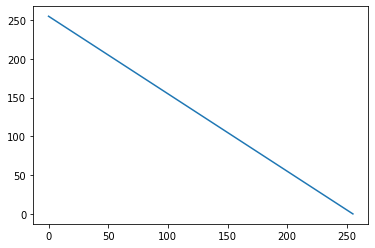

In [37]:
# lookup table for negative
plt.plot(create_lut([(0, 255), (255, 0)]));

In [38]:
# lookup table for thresholding
ar3 =create_lut([(0, 0), (100, 0), (101, 255), (255, 255)])

In [39]:
len(ar3)

256

In [40]:
np.linspace(11, 19, 19-11)

array([11.        , 12.14285714, 13.28571429, 14.42857143, 15.57142857,
       16.71428571, 17.85714286, 19.        ])

In [43]:
# lookup table for contrast enhancement
q_enh = create_lut([(0, 0), (50, 10), (200, 245), (255, 255)])

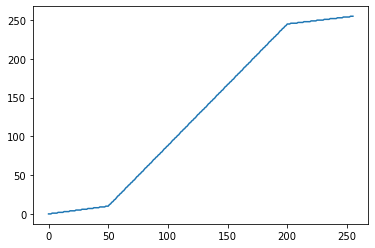

In [44]:
plt.plot(p, q_enh);

In [45]:
enh = q_enh[gray]

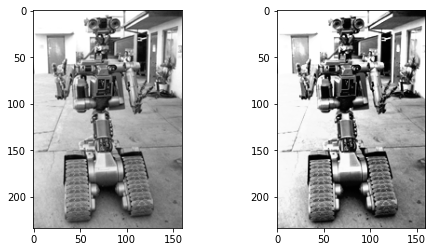

In [46]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(enh, cmap='gray', vmin=0, vmax=255);

## Transformations compared

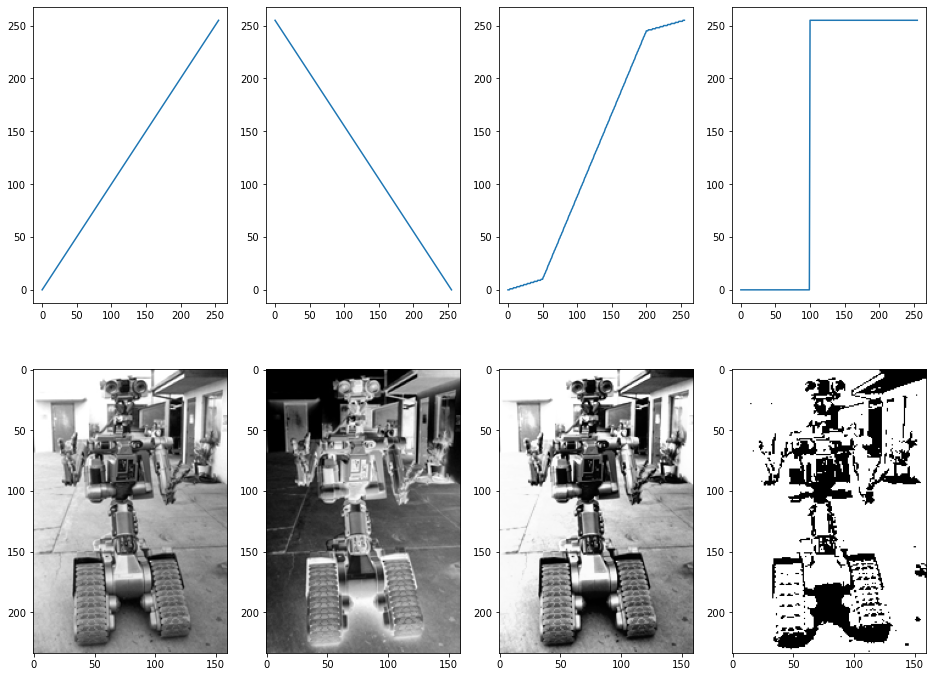

In [47]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 4, 1)
plt.plot(p, p)
plt.subplot(2, 4, 2)
plt.plot(p, q_neg)
plt.subplot(2, 4, 3)
plt.plot(p, q_enh)
plt.subplot(2, 4, 4)
plt.plot(p, q_seg)
plt.subplot(2, 4, 5)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 4, 6)
plt.imshow(neg, cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 4, 7)
plt.imshow(enh, cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 4, 8)
plt.imshow(seg, cmap='gray', vmin=0, vmax=255);

# Histogram equalization

In [48]:
rgb = cv2.imread('data/rentgen.bmp')[..., ::-1]
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

In [49]:
gray

array([[ 89,  98, 100, ..., 120, 120, 119],
       [ 89,  98, 100, ..., 120, 120, 119],
       [ 90,  99, 100, ..., 119, 119, 119],
       ...,
       [127, 127, 125, ..., 114, 115, 116],
       [128, 128, 127, ..., 115, 115, 117],
       [129, 129, 128, ..., 116, 116, 117]], dtype=uint8)

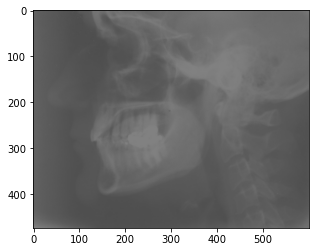

In [50]:
plt.imshow(rgb)

In [51]:
h, b = np.histogram(gray, bins=np.arange(257))

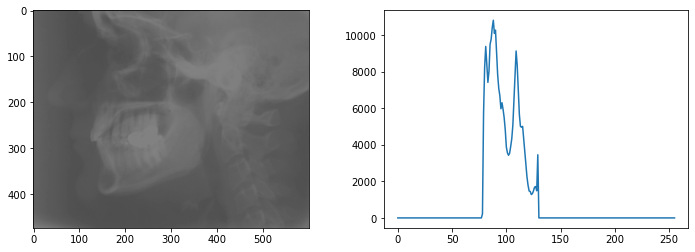

In [52]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.plot(b[:256], h);

### Homework: create a function `histeq_lut`



Create a function `histeq_lut` that will return a brightness transformation lookup table for histogram equalization of a grayscale image.

Input:
- `gray`: Grayscale image of type `np.ndarray`

Output:
- `q_equ`: lookup table as a vector of 256 values of type `np.ndarray` with shape `(256,)`

In [53]:
def histeq_lut(gray: np.ndarray) -> np.ndarray:
    """
    lookup table for histogram equalization
    """

    ########################################
    # TODO: implement
    h, b = np.histogram(gray, bins=np.arange(257))
    q_equ = np.zeros(256)
    for i in range(1, len(h)):
        q_equ[i-1] = np.sum(h[:i])
    q_equ = np.array(q_equ)
    q_equ = q_equ/np.max(q_equ)
    q_equ = q_equ*255
    q_equ = np.round(q_equ)
    q_equ = q_equ.astype(int)
    # ENDTODO
    ########################################
    
    return q_equ

In [54]:
q_equ = histeq_lut(gray)

In [55]:
equ = q_equ[gray]
equ.dtype, equ.shape

(dtype('int32'), (474, 600))

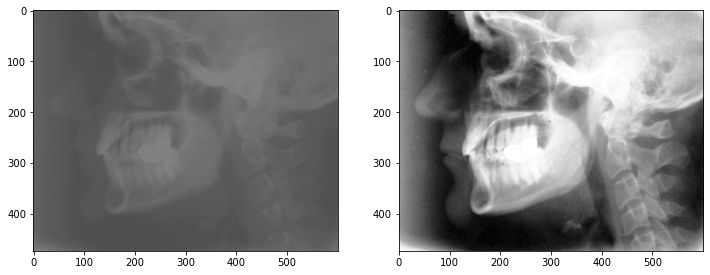

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(equ, cmap='gray', vmin=0, vmax=255)

# Histogram equalization for RGB images

In [57]:
rgb = cv2.imread('data/sunflowers.png')[..., ::-1]
# rgb = cv2.imread('data/fruits.jpg')[..., ::-1]
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

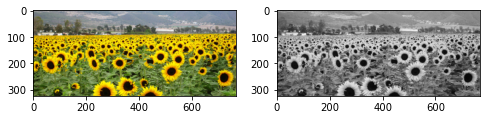

In [58]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255);

### Homework: histogram equalization for R, G and B channels independently

In [59]:
rgb.shape

(323, 768, 3)

In [60]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [61]:
########################################
# TODO: 
# create `equ_indep` image, that will be the equalized version of the original `rgb`; it should have same shape and dtype as rgb
equ_indep = np.zeros(rgb.shape[0]*rgb.shape[1]*3).reshape(rgb.shape[0],rgb.shape[1],3)
r, g, b= histeq_lut(rgb[:,:,0]), histeq_lut(rgb[:,:,1]), histeq_lut(rgb[:,:,2])
equ_indep[:,:,0] = r[rgb[:,:,0]]
equ_indep[:,:,1]= g[rgb[:,:,1]]
equ_indep[:,:,2] = b[rgb[:,:,2]]
equ_indep = equ_indep.astype(int)
equ_indep.shape
# ENDTODO
########################################

(323, 768, 3)

In [62]:
r[rgb[:,:,0]]

array([[170, 172, 173, ..., 131, 133, 144],
       [169, 172, 176, ..., 120, 127, 125],
       [169, 159, 148, ..., 118, 120, 114],
       ...,
       [ 75,  66,  71, ...,  60,  72,  76],
       [ 75,  75,  82, ...,  57,  71,  71],
       [ 93,  91,  87, ...,  38,  78,  72]])

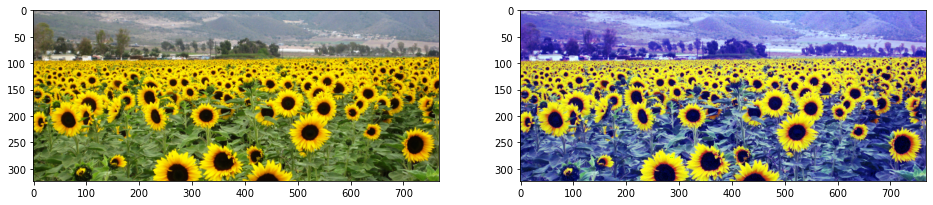

In [63]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.imshow(equ_indep)

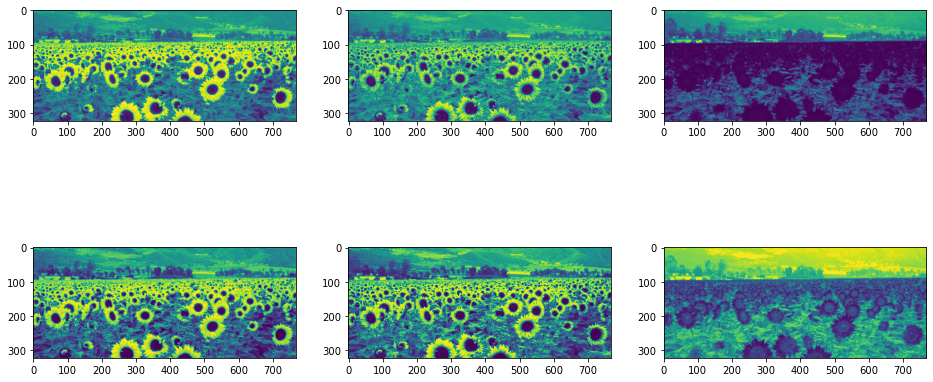

In [64]:
plt.figure(figsize=(16, 8))
for c in range(3):
    plt.subplot(2, 3, 1 + c)
    plt.imshow(rgb[..., c], vmin=0, vmax=255)  # original c-th channel
    plt.subplot(2, 3, 4 + c)
    plt.imshow(equ_indep[..., c], vmin=0, vmax=255)  # equalized c-th channel

### Homework: the same histogram equalization lookup table computed from *gray* applied to R, G and B

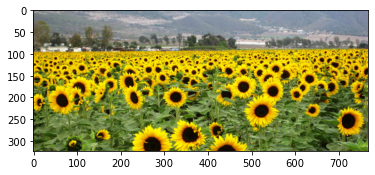

In [65]:
plt.imshow(rgb)

In [66]:
########################################
# TODO: 
# create `equ_gray` image, that will be the equalized version of the original `rgb`; it should have same shape and dtype as rgb
gray_img = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
table = histeq_lut(gray_img)
equ_gray = np.zeros(rgb.shape[0]*rgb.shape[1]*3).reshape(rgb.shape[0],rgb.shape[1],3)
equ_gray[:,:,0] = table[rgb[:,:,0]]
equ_gray[:,:,1]= table[rgb[:,:,1]]
equ_gray[:,:,2] = table[rgb[:,:,2]]
equ_gray = equ_gray.astype(int)
equ_indep.shape
# ENDTODO

# ENDTODO
########################################

(323, 768, 3)

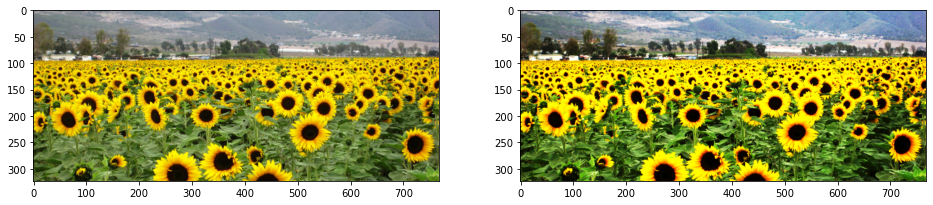

In [67]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.imshow(equ_gray)

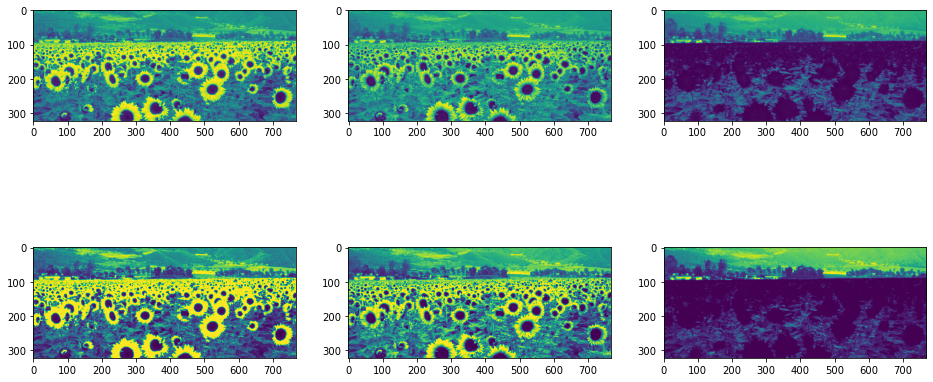

In [68]:
plt.figure(figsize=(16, 8))
for c in range(3):
    plt.subplot(2, 3, 1 + c)
    plt.imshow(rgb[..., c], vmin=0, vmax=255)  # original c-th channel
    plt.subplot(2, 3, 4 + c)
    plt.imshow(equ_gray[..., c], vmin=0, vmax=255)  # equalized c-th channel

### Homework: convert to YUV/YCbCr/HSV/Lab/..., equalize brigthness channel, and convert back to RGB

In [69]:
########################################
# TODO: 
# create `equ_yuv` image, that will be the equalized version of the original `rgb`; it should have same shape and dtype as rgb
yuv = cv2.cvtColor(rgb, cv2.COLOR_RGB2YUV)
table = histeq_lut(yuv[:,:,0])
equ_yu = yuv
equ_yu[:,:,0] = table[equ_yu[:,:,0]]
equ_yuv = cv2.cvtColor(equ_yu, cv2.COLOR_YUV2RGB)
# ENDTODO
########################################

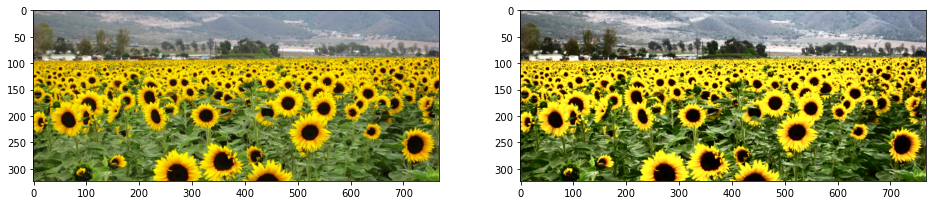

In [70]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.imshow(equ_yuv)

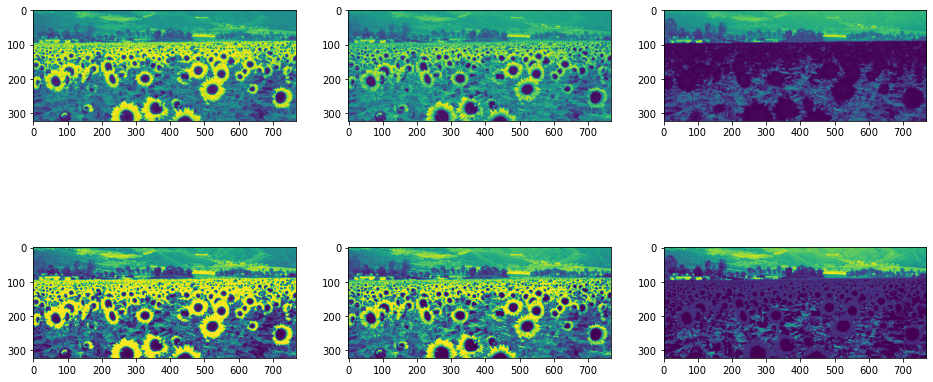

In [71]:
plt.figure(figsize=(16, 8))
for c in range(3):
    plt.subplot(2, 3, 1 + c)
    plt.imshow(rgb[..., c], vmin=0, vmax=255)  # original c-th channel
    plt.subplot(2, 3, 4 + c)
    plt.imshow(equ_yuv[..., c], vmin=0, vmax=255)  # equalized c-th channel

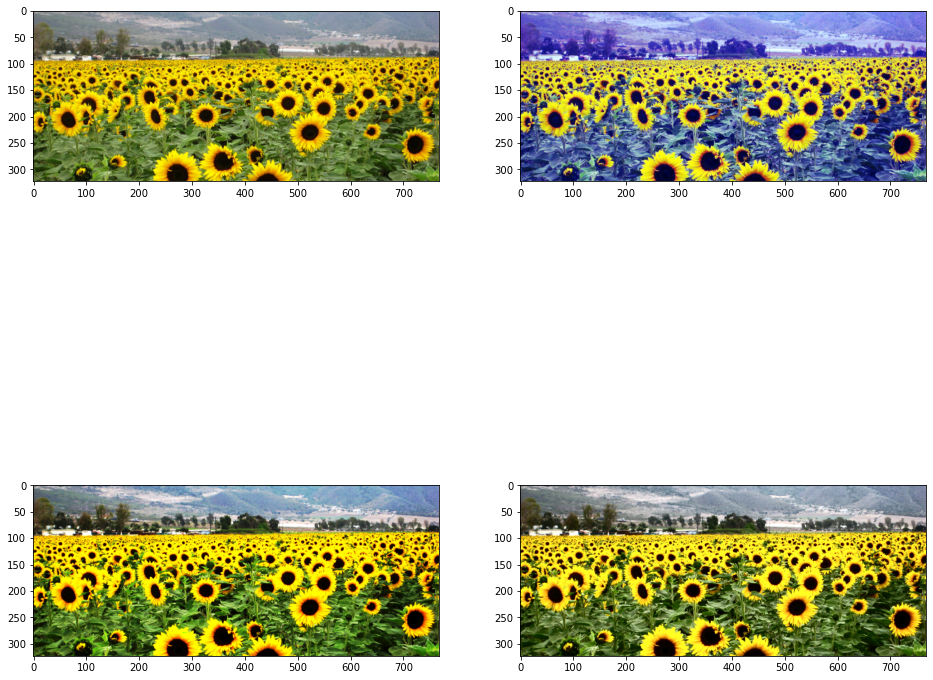

In [72]:
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(rgb)
plt.subplot(2, 2, 2)
plt.imshow(equ_indep)
plt.subplot(2, 2, 3)
plt.imshow(equ_gray)
plt.subplot(2, 2, 4)
plt.imshow(equ_yuv);